In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
DATA_URL = 'https://raw.githubusercontent.com/diego-marcelino/sandbox-ds-ml/master/igti-bootcamp-machine-learning/mod-01-task-02/data.csv'
bike_sharing = pd.read_csv(DATA_URL)
bike_sharing.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [3]:
bike_sharing.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000
mean,8676.513842,2.503420,0.501758,6.536091,11.521258,0.028131,2.999233,0.682118,1.423950,0.497062,0.476281,0.627579,0.189247,35.583147,153.644972,189.919826
std,5010.773755,1.107636,0.500013,3.441490,6.917606,0.165353,2.005300,0.465668,0.638982,0.192451,0.172520,0.192893,0.122188,49.226455,151.750573,181.972508
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4335.000000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8678.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13005.000000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17377.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### 1. No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?
- [ ] (15,1345)
- [ ] (1345,15)
- [x] (17379,17)
- [ ] (17,17379)


In [4]:
bike_sharing.shape

(17379, 17)

### 2. Quantos tipos diferentes de dados existem no dataset do desafio?

- [ ] 17
- [ ] 3
- [x] 2
- [ ] 12


In [5]:
bike_sharing.dtypes.value_counts()

float64    16
object      1
dtype: int64

### 3. Qual é a proporção (em %) de valores nulos existente na coluna 'temp' (temperatura ambiente normalizada)?

- [ ] 15%
- [x] 10%
- [ ] 0%
- [ ] 5%


In [6]:
temp_na_count = bike_sharing.temp.isna().sum()
temp_na_count

1738

In [7]:
temp_total_count = bike_sharing.temp.size
temp_total_count

17379

In [8]:
percentage = (temp_na_count / temp_total_count) * 100
percentage

10.000575407100524

### 4. Após retirar as linhas que contém valores nulos para a coluna 'dteday', passamos a contar com quantas instancias e atributos, respectivamente?
- [x] (15641,17)
- [ ] (17379,17)
- [ ] (17,17379)
- [ ] (17,15641)


In [9]:
dteday_non_na = bike_sharing.dropna(subset=['dteday'])
dteday_non_na.shape

(15641, 17)

### 5. Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o valor médio para os dados da coluna "temp" (temperatura ambiente normalizada)?

- [x] 0,496
- [ ] 1,192
- [ ] 0,156
- [ ] 0,192


In [10]:
dteday_non_na.temp.mean()

0.4969259206597582

### 6. Considere o dataset após a retirada das linhas que continham valores nulos para a coluna 'dteday'. Qual é o desvio padrão para os dados da coluna 'windspeed' (velocidade do vento normalizada)?

- [ ] 0,189
- [ ] 0,192
- [ ] 1,122
- [x] 0,122


In [11]:
dteday_non_na.windspeed.std()

0.12230930508286268

### 7. Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Transforme a coluna "season" em valores categóricos. Quantas categorias diferentes existem?

- [ ] 3
- [ ] 2
- [x] 4
- [ ] 1


In [12]:
dteday_non_na.season.value_counts()

3.0    3623
2.0    3523
4.0    3478
1.0    3437
Name: season, dtype: int64

### 8. Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Transforme a coluna "dteday" no tipo "datetime". Qual é a última data presente no dataset ( YYYY-MM-DD)?

- [x] 2012-12-31
- [ ] 2012-01-31
- [ ] 2014-12-31
- [ ] 2012-01-31


In [13]:
dteday_non_na.dteday.tail(1)

17378    2012-12-31
Name: dteday, dtype: object

### 9. Considere o dataset após a retirada das linhas que continham valores nulos para a coluna 'dteday'. Considerendo o boxplot da variável 'windspeed' (velocidade do vento) é CORRETO afirmar?

- [ ] Não existem possíveis outliers, pois não existem marcações (pontos) foras dos limites do boxplot.
- [x] Existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot.
- [ ] Existem possíveis outliers, pois não existem marcações (pontos) foras dos limites do boxplot.
- [ ] Não existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot.


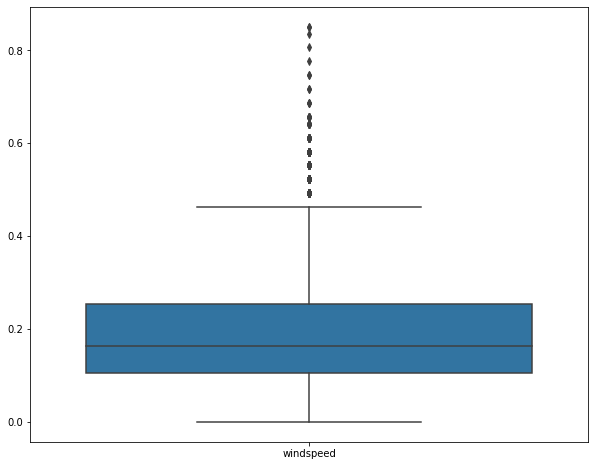

In [14]:
plt.figure(figsize=(10,8))
sns.boxplot(data=dteday_non_na[['windspeed']])

### 10. Considere o dataset após a retirada das linhas que continham valores nulos para a coluna 'dteday'. Selecione as colunas 'season', 'temp', 'atemp', 'hum', 'windspeed'. Plot a matriz de correlação. Sobre as variáveis 'hum' e 'cnt' é CORRETO afirmar:

- [x] Possuem baixa correlação linear negativa
- [ ] Possuem alta correlação linear positiva.
- [ ] Possuem baixa correlação linear positiva.
- [ ] Possuem alta correlação linear negativa.

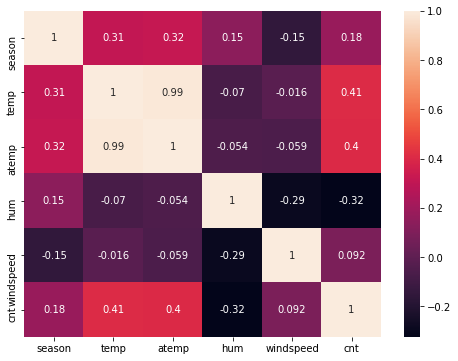

In [15]:
features = ['season', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
plt.figure(figsize=(8,6))
sns.heatmap(dteday_non_na[features].corr().round(3), annot=True)

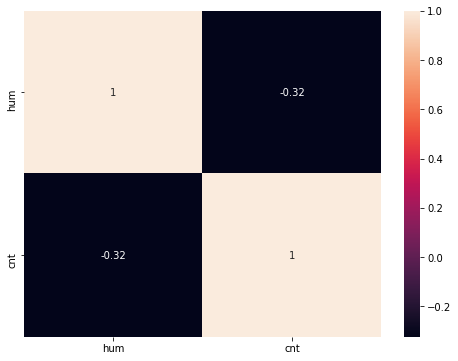

In [16]:
features = ['hum', 'cnt']
plt.figure(figsize=(8,6))
sns.heatmap(dteday_non_na[features].corr().round(3), annot=True)

### 11. Preencha os valores nulos das colunas 'hum', 'cnt' e 'casual' com os valores médios. Utilize as variáveis 'hum' e 'casual' como independentes e a 'cnt' como dependente. Aplique uma regressão linear. Qual o valor de R2? Utilize as entradas como teste.
- [ ] -0.40
- [ ] -0.80
- [ ] 0.80
- [x] 0.40

In [17]:
df = dteday_non_na[['hum', 'casual', 'cnt']].copy()
df.hum.fillna(df.hum.mean(), inplace=True)
df.cnt.fillna(df.cnt.mean(), inplace=True)
df.casual.fillna(df.casual.mean(), inplace=True)
df.isna().sum()

hum       0
casual    0
cnt       0
dtype: int64

In [18]:
features = ['hum', 'casual']
x = df[features]
x.head()

,hum,casual
1,0.80,8.0
2,0.80,5.0
3,0.75,3.0
4,0.75,0.0
5,0.75,0.0


In [19]:
y = df.cnt
y.head()

1    40.0
2    32.0
3    13.0
4     1.0
5     1.0
Name: cnt, dtype: float64

In [20]:
model = LinearRegression()
regression = model.fit(x, y)
predicted_cnt = regression.predict(x)
predicted_cnt

array([111.21425222, 104.5688863 , 105.12614851, ..., 191.89476367,
       146.22989168, 135.03725861])

In [21]:
r2_score(df.cnt, predicted_cnt)

0.4059859251122173

### 12. Utilize os mesmos dados da questão anterior ('hum' e 'casual' como variáveis independentes e 'cnt' como variavel dependente). Aplique a árvore de decisão como regressão. Qual é o valor aproximado de R2? Utilize as entradas como teste e valores 'default'.

- [ ] 0,40
- [x] 0,70
- [ ] 1,00
- [ ] 0,30


In [22]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [23]:
predicted_cnt = regressor.predict(x)
predicted_cnt

array([141.66666667,  92.03316997, 103.37755996, ..., 215.29990198,
        69.5       , 251.        ])

In [24]:
r2_score(df.cnt, predicted_cnt)

0.7098339715834964

### 13. Comparando os valores de R2 encontrado com a regressão linear e com a árvore de decisão, é CORRETO afirmar:

- [ ] O valor encontrado pela árvore de decisão foi negativo.
- [x] O valor obtido pela árvore de decisão como regressor apresenta maior R2
- [ ] O valor encontrado pela regressão linear é superior ao encontrado pela árvore de decisão.
- [ ] Os valores encontrados pela árvore de decisão como regressor e a regressão linear são próximos.


### 14. Comparando o SVM com a árvore de decisão é CORRETO afirmar:

- [ ] SVM e Árvore de Decisão só podem ser utilizados para modelos de classificação.
- [x] SVM encontra o hiperplano que gera a maior separação entre os dados.
- [ ] Através da Árvore de Decisão não é possível encontrar os limiares de separação entre as classes.
- [ ] Árvore de decisão encontra os hiperplanos de separação do mesmo modo que o SVM.


### 15. Com base na árvore de decisão é CORRETO afirmar:

- [ ] Ávore de Decisão é utilizada apenas para a classificação de dados contínuos.
- [ ] A análise de regressão com a árvore de decisão só pode ser realizada com valores categóricos.
- [x] Pode ser utilizada para classificação e regressão.
- [ ] Não é possível encontrar os limites de separação entre os conjuntos de dados a partir de uma classificação realizada através da árvore de decisão.


## Support materials

- [Decision Tree Algorithm — Explained](https://towardsdatascience.com/decision-tree-algorithm-explained-83beb6e78ef4)